#Human Activity Recognition using Deep Learning

Group Members-:
1. Gagan Deep Singh (251368991)
2. Gurjot Singh(251362186)
3. Mansimar Singh Bhatia(251397046)
4. Sherry Ahuja(251383252)

Dataset Link- https://www.kaggle.com/datasets/meetnagadia/human-action-recognition-har-dataset


##Defining Dataset Path and Importing libraries

In [ ]:
dataset_path = 'Human Action Recognition 2'

In [ ]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

##Data Preprocessing

In [ ]:
train_labels = pd.read_csv(os.path.join(dataset_path, 'Training_set.csv'))
test_images = pd.read_csv(os.path.join(dataset_path, 'Testing_set.csv'))

# Display the first few rows
print(train_labels.head())

      filename         label
0  Image_1.jpg       sitting
1  Image_2.jpg  using_laptop
2  Image_3.jpg       hugging
3  Image_4.jpg      sleeping
4  Image_5.jpg  using_laptop


In [ ]:
print(train_labels['label'].unique())
print(len(train_labels['label'].unique()))

['sitting' 'using_laptop' 'hugging' 'sleeping' 'drinking' 'clapping'
 'dancing' 'cycling' 'calling' 'laughing' 'eating' 'fighting'
 'listening_to_music' 'running' 'texting']
15


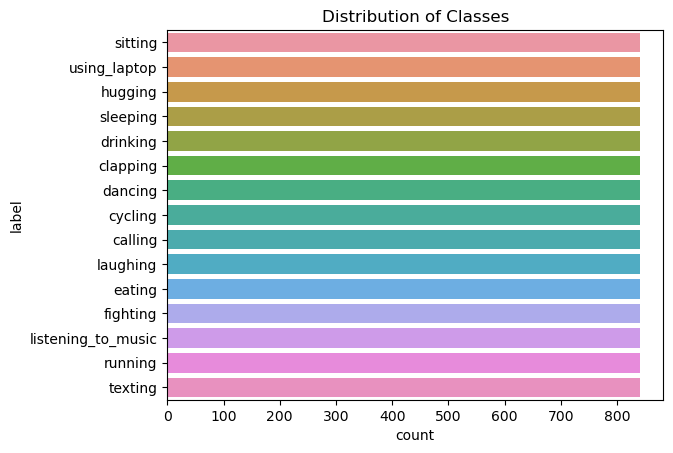

In [ ]:
# Display the distribution of classes
sns.countplot(y='label', data=train_labels)
plt.title('Distribution of Classes')
plt.show()

# Check a few images to understand their sizes, color channels, etc.
sample_image_path = os.path.join(dataset_path, 'train', train_labels['filename'][1])
sample_image = Image.open(sample_image_path)

In [ ]:
print(f"Sample Image Size: {sample_image.size}")

Sample Image Size: (275, 183)


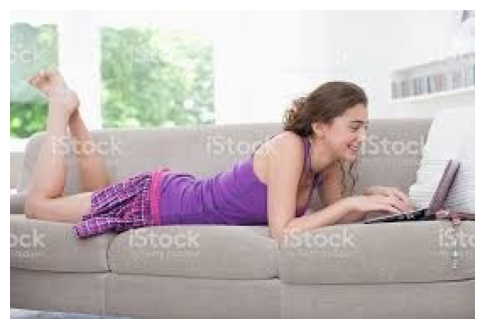

In [ ]:
#Showing the sample image
plt.figure(figsize=(6, 6))
plt.imshow(sample_image)
plt.axis('off')
plt.show()

In [ ]:
#setting image height and width
image_height = 224
image_width = 224

In [ ]:
# Setup the training and validation data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2,
                                   horizontal_flip = True,
                                   vertical_flip   = False,
                                   shear_range=0.2,
                                   zoom_range=0.1,
                                   rotation_range  = 30)

## Mapping images to their classes.

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_labels,
    directory=os.path.join(dataset_path, 'train'),
    x_col="filename",
    y_col="label",
    subset="training",
    color_mode = "rgb",
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
    class_mode="categorical",
    target_size=(image_height,image_width))

valid_generator = train_datagen.flow_from_dataframe(
    dataframe=train_labels,
    directory=os.path.join(dataset_path, 'train'),
    x_col="filename",
    y_col="label",
    subset="validation",
    color_mode = "rgb",
    batch_size=BATCH_SIZE,
    shuffle=False,
    seed=42,
    class_mode="categorical",
    target_size=(image_height,image_width))

test_gen = ImageDataGenerator(rescale = 1./255.)

Found 10080 validated image filenames belonging to 15 classes.
Found 2520 validated image filenames belonging to 15 classes.


In [ ]:
#Preprocessing Test images
def read_img(fn):
    img = Image.open(fn)
    return np.asarray(img.resize((224,224)))

In [ ]:
# Get labels in dataset
a = train_generator.class_indices
class_names = list(a.keys())  # storing class/breed names in a list

In [ ]:
class_indices = valid_generator.class_indices
class_indices

{'calling': 0,
 'clapping': 1,
 'cycling': 2,
 'dancing': 3,
 'drinking': 4,
 'eating': 5,
 'fighting': 6,
 'hugging': 7,
 'laughing': 8,
 'listening_to_music': 9,
 'running': 10,
 'sitting': 11,
 'sleeping': 12,
 'texting': 13,
 'using_laptop': 14}

In [ ]:
# Define function to plot some images
import matplotlib.pyplot as plt

def plot_images(img, true_labels, predictions = None):
    plt.figure(figsize=[12, 18])
    for i in range(24):
        plt.subplot(6, 4, i+1)
        plt.imshow(img[i])
        plt.axis('off')
        if (predictions is not None):
            if true_labels is not None:
                plt.title("{}\n {} {:.1f}%".format(class_names[np.argmax(true_labels[i])], class_names[np.argmax(predictions[i])], 100 * np.max(predictions[i])))
            else:
                plt.title("{} {:.1f}%".format(class_names[np.argmax(predictions[i])], 100 * np.max(predictions[i])))
        else:
            if true_labels is not None:
                plt.title(class_names[np.argmax(true_labels[i])])

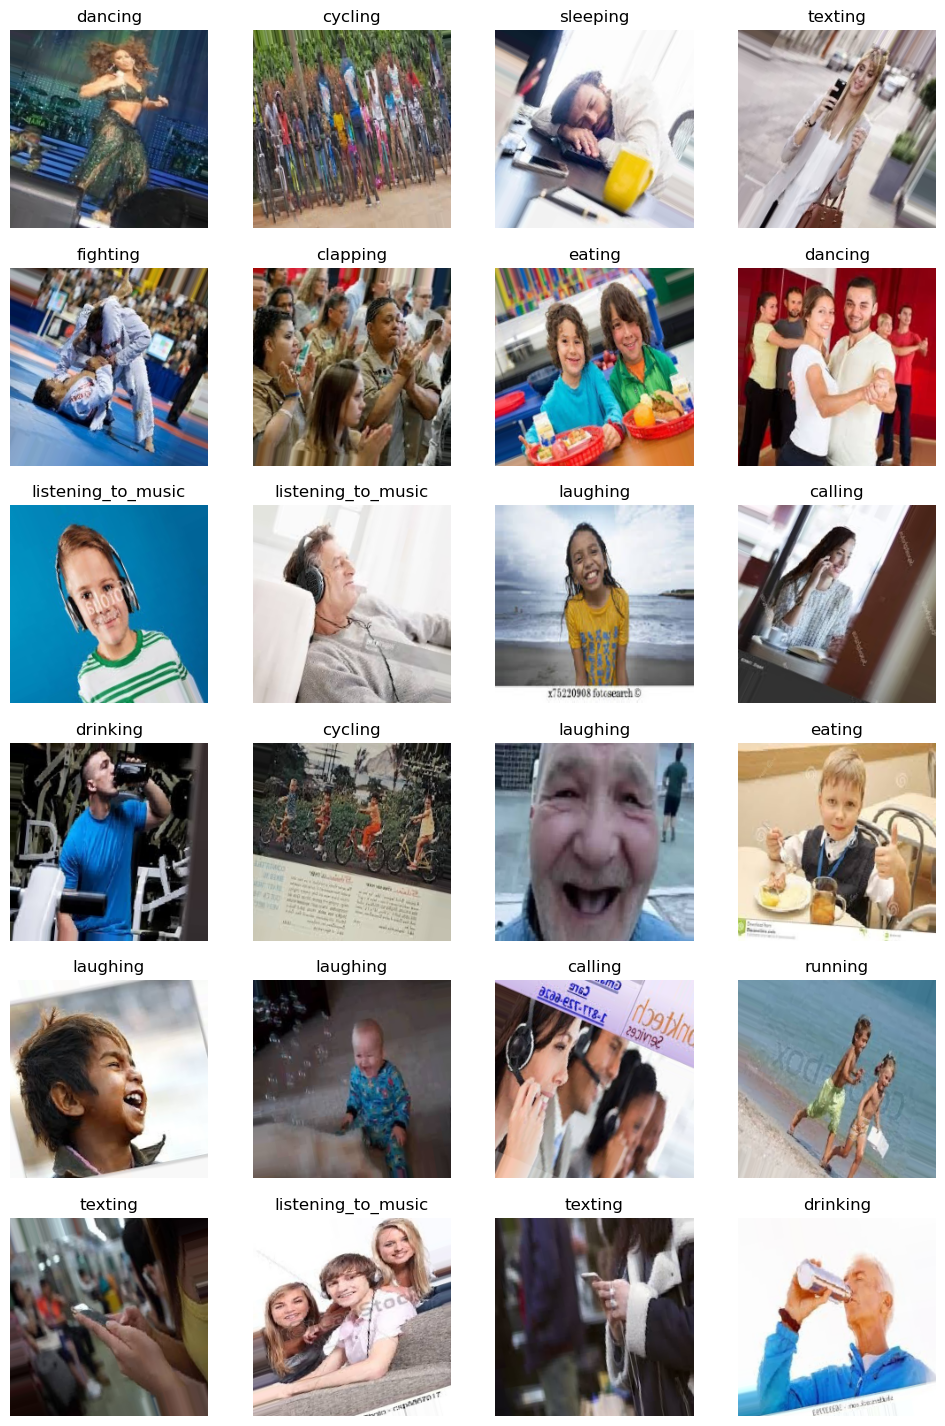

In [ ]:
#Printing sample preprocessed images
x,y = next(train_generator)
plot_images(x,y)

In [ ]:
# function to plot training history
def plot_history(history):
    # store results
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # plot results
    # accuracy
    plt.figure(figsize=(5, 8))
    plt.rcParams['figure.figsize'] = [8, 4]
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.grid'] = True
    plt.rcParams['figure.facecolor'] = 'white'
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.title(f'\nTraining and Validation Accuracy. \nTrain Accuracy: {str(round(acc[-1],3))}\nValidation Accuracy: {str(round(val_acc[-1],3))}')

    # loss
    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.title(f'Training and Validation Loss. \nTrain Loss: {str(round(loss[-1],3))}\nValidation Loss: {str(round(val_loss[-1],3))}')
    plt.xlabel('epoch')
    plt.tight_layout(pad=3.0)
    plt.show()


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_heatmap(y_true, y_pred, class_names, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        cm,
        annot=True,
        square=True,
        xticklabels=class_names,
        yticklabels=class_names,
        fmt='d',
        cmap=plt.cm.Blues,
        cbar=False,
        ax=ax)
    ax.set_title(title, fontsize = 12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right")
    ax.set_ylabel('True Label', fontsize= 10)
    ax.set_xlabel('Predicted Label', fontsize = 10)

In [ ]:
!pip install keras-tuner

##CNN Model

In [ ]:
from tensorflow.keras.optimizers import Adam

# Define a simple CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(image_height, image_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax')
])

new_learning_rate = 1e-4
optimizer = Adam(learning_rate=new_learning_rate)
# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 10, 10, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 256)            │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,396,143 (12.96 MB)

 Trainable params: 1,132,047 (4.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,264,096 (8.64 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True,
    verbose=1
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    min_lr=1e-6)

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=valid_generator,
    callbacks=[early_stopping, ]
)


Epoch 1/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 135s 425ms/step - accuracy: 0.1441 - loss: 2.5648 - val_accuracy: 0.2183 - val_loss: 2.3827 - learning_rate: 1.0000e-04
Epoch 2/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 133s 420ms/step - accuracy: 0.2156 - loss: 2.3614 - val_accuracy: 0.2369 - val_loss: 2.2911 - learning_rate: 1.0000e-04
Epoch 3/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 133s 420ms/step - accuracy: 0.2600 - loss: 2.2623 - val_accuracy: 0.2710 - val_loss: 2.2240 - learning_rate: 1.0000e-04
Epoch 4/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 133s 419ms/step - accuracy: 0.2846 - loss: 2.1936 - val_accuracy: 0.2921 - val_loss: 2.1637 - learning_rate: 1.0000e-04
Epoch 5/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 134s 422ms/step - accuracy: 0.2997 - loss: 2.1432 - val_accuracy: 0.3040 - val_loss: 2.1523 - learning_rate: 1.0000e-04
Epoch 6/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 134s 421ms/step - accuracy: 0.3147 - loss: 2.0935 - val_accuracy: 0.3306 - val_loss: 2.0851 - learning_rate: 1.0000e-04
Epoch 7/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
model.save('CNN_model.h5')

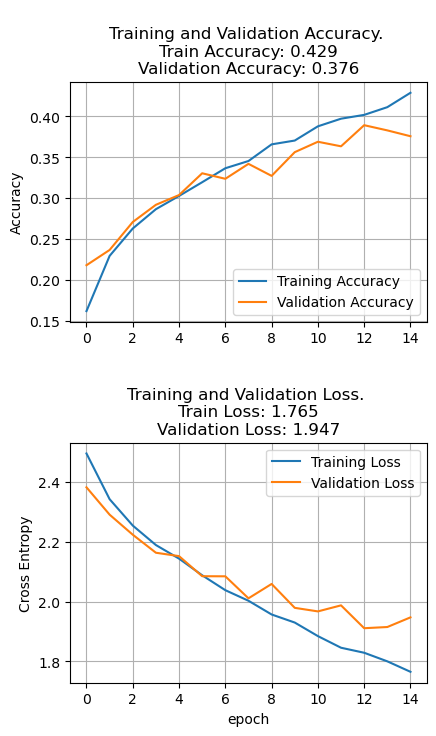

In [ ]:
plot_history(history)

In [ ]:
accuracy_score = model.evaluate(valid_generator)

print("Validation Accuracy: {:.2f}%".format(accuracy_score[1] * 100))
print("Validation Loss: {:.3f}".format(accuracy_score[0]))

79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 187ms/step - accuracy: 0.3571 - loss: 1.9429
Validation Accuracy: 37.58%
Validation Loss: 1.908


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
valid_generator.shuffle = False
valid_generator.batch_size = 32

In [ ]:
valid_generator.reset()
Y_pred = model.predict(valid_generator, 32)
y_pred = np.argmax(Y_pred, axis=1)

79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 188ms/step


In [ ]:
# Get the true labels
y_true = valid_generator.classes

Classification Report
                    precision    recall  f1-score   support

           calling       0.23      0.23      0.23       156
          clapping       0.31      0.26      0.28       176
           cycling       0.69      0.71      0.70       165
           dancing       0.40      0.34      0.37       147
          drinking       0.30      0.29      0.30       165
            eating       0.43      0.75      0.55       173
          fighting       0.48      0.52      0.50       178
           hugging       0.27      0.34      0.30       185
          laughing       0.39      0.42      0.41       177
listening_to_music       0.28      0.24      0.26       151
           running       0.42      0.59      0.49       155
           sitting       0.23      0.21      0.22       173
          sleeping       0.48      0.28      0.35       178
           texting       0.28      0.19      0.23       158
      using_laptop       0.45      0.33      0.38       183

          accura

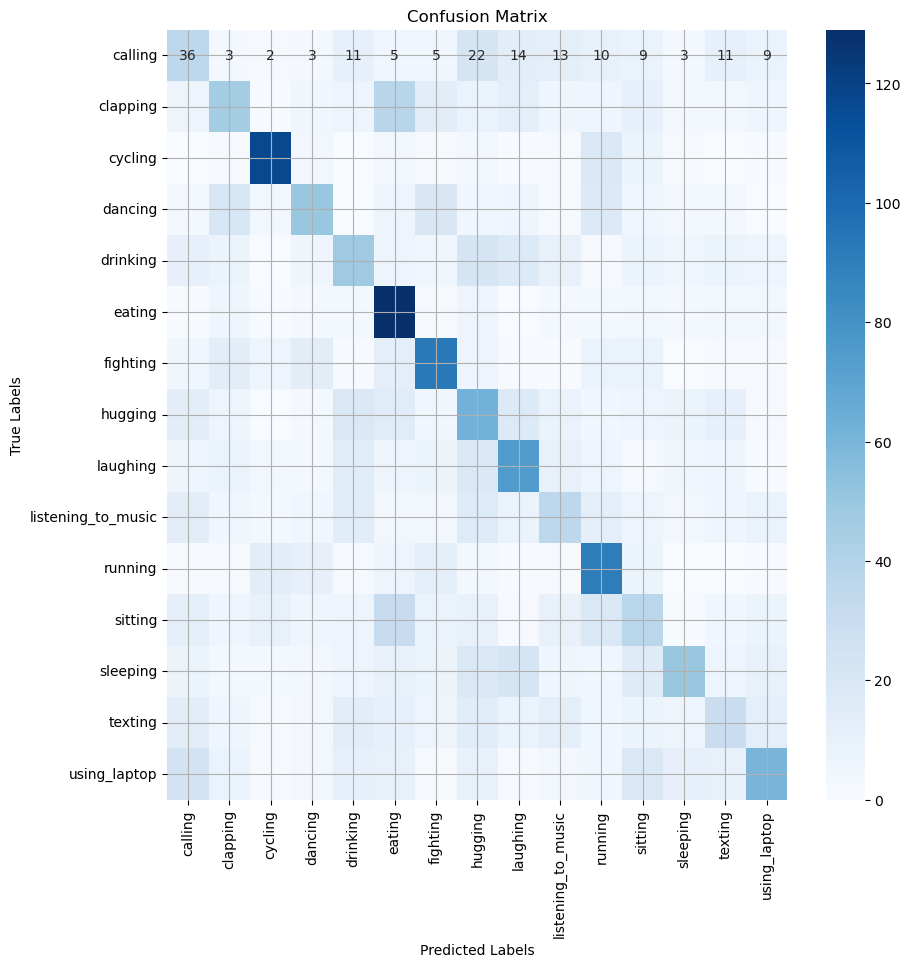

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Generate a classification report which includes precision, recall, and F1-score for each class
target_names = list(valid_generator.class_indices.keys())  # Get the class names
report = classification_report(y_true, y_pred, target_names=target_names)
print('Classification Report')
print(report)

# Plot the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#Transfer Learning

##ResNet50

In [ ]:
from tensorflow.keras.models import Model

def create_model(base_model):

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation = 'relu')(x)

    outputs = Dense(15, activation='softmax')(x)

    model = Model(base_model.inputs, outputs)

    return model

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the ResNet50 model, pre-trained weights
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

# Freeze the layers
for layer in base_model_resnet.layers:
    layer.trainable = False

resnet_model = create_model(base_model_resnet)

In [ ]:
resnet_model.summary()

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_18      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_18[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,116,111 (92.00 MB)

 Trainable params: 528,399 (2.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Compile the model
resnet_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set up the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Continue training with early stopping
history = resnet_model.fit(
    train_generator,
    epochs=150,
    validation_data=valid_generator,
    callbacks=[early_stopping]
)


Epoch 1/150
315/315 ━━━━━━━━━━━━━━━━━━━━ 270s 847ms/step - accuracy: 0.0831 - loss: 2.7268 - val_accuracy: 0.1159 - val_loss: 2.6444
Epoch 2/150
315/315 ━━━━━━━━━━━━━━━━━━━━ 272s 859ms/step - accuracy: 0.1158 - loss: 2.6398 - val_accuracy: 0.1298 - val_loss: 2.6022
Epoch 3/150
315/315 ━━━━━━━━━━━━━━━━━━━━ 271s 857ms/step - accuracy: 0.1398 - loss: 2.6092 - val_accuracy: 0.1631 - val_loss: 2.5793
Epoch 4/150
315/315 ━━━━━━━━━━━━━━━━━━━━ 270s 855ms/step - accuracy: 0.1429 - loss: 2.5850 - val_accuracy: 0.1389 - val_loss: 2.5655
Epoch 5/150
315/315 ━━━━━━━━━━━━━━━━━━━━ 269s 851ms/step - accuracy: 0.1445 - loss: 2.5765 - val_accuracy: 0.1655 - val_loss: 2.5473
Epoch 6/150
315/315 ━━━━━━━━━━━━━━━━━━━━ 268s 847ms/step - accuracy: 0.1614 - loss: 2.5538 - val_accuracy: 0.1742 - val_loss: 2.5297
Epoch 7/150
315/315 ━━━━━━━━━━━━━━━━━━━━ 269s 850ms/step - accuracy: 0.1604 - loss: 2.5516 - val_accuracy: 0.1563 - val_loss: 2.5367
Epoch 8/150
315/315 ━━━━━━━━━━━━━━━━━━━━ 268s 848ms/step - accuracy: 

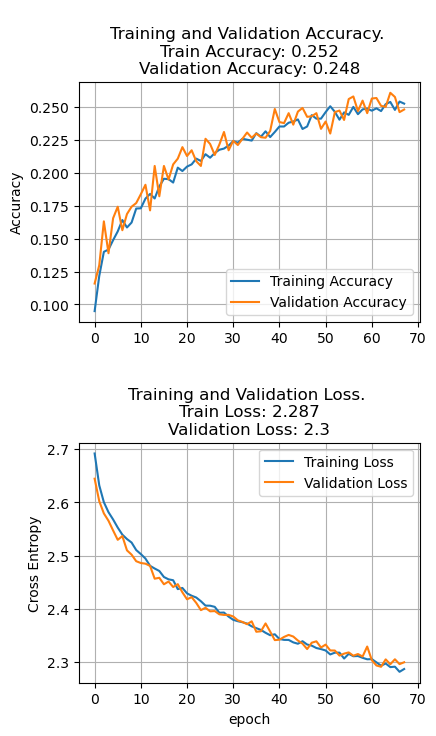

In [ ]:
plot_history(history)

In [ ]:
# Unfreeze some layers of the base model
for layer in base_model_resnet.layers[:25]:
    layer.trainable = True

resnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training
history_fine = resnet_model.fit(
    train_generator,
    steps_per_epoch=32,
    epochs=15,
    validation_data=valid_generator,
    validation_steps=32
)


Epoch 1/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 100s 3s/step - accuracy: 0.4067 - loss: 1.8559 - val_accuracy: 0.0947 - val_loss: 6.6176
Epoch 2/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 96s 3s/step - accuracy: 0.4279 - loss: 1.6879 - val_accuracy: 0.1279 - val_loss: 6.7553
Epoch 3/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.4469 - loss: 1.7328 - val_accuracy: 0.1250 - val_loss: 6.2869
Epoch 4/15


2024-04-02 08:52:34.104697: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


32/32 ━━━━━━━━━━━━━━━━━━━━ 97s 3s/step - accuracy: 0.4704 - loss: 1.7085 - val_accuracy: 0.1074 - val_loss: 6.8974
Epoch 5/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 96s 3s/step - accuracy: 0.4397 - loss: 1.6798 - val_accuracy: 0.1484 - val_loss: 6.2048
Epoch 6/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.5055 - loss: 1.6121 - val_accuracy: 0.1483 - val_loss: 5.5524
Epoch 7/15


2024-04-02 08:57:10.694525: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


32/32 ━━━━━━━━━━━━━━━━━━━━ 97s 3s/step - accuracy: 0.4839 - loss: 1.5417 - val_accuracy: 0.1484 - val_loss: 6.3574
Epoch 8/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 96s 3s/step - accuracy: 0.5132 - loss: 1.5213 - val_accuracy: 0.1816 - val_loss: 5.7838
Epoch 9/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.5192 - loss: 1.4497 - val_accuracy: 0.1886 - val_loss: 4.7116
Epoch 10/15


2024-04-02 09:01:47.206044: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/32 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.4835 - loss: 1.5222

2024-04-02 09:02:49.508372: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


32/32 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.4861 - loss: 1.5104 - val_accuracy: 0.2070 - val_loss: 4.4066
Epoch 11/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 97s 3s/step - accuracy: 0.5503 - loss: 1.4697 - val_accuracy: 0.2656 - val_loss: 3.1937
Epoch 12/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.5441 - loss: 1.4110 - val_accuracy: 0.3114 - val_loss: 2.2359
Epoch 13/15


2024-04-02 09:06:12.670615: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


32/32 ━━━━━━━━━━━━━━━━━━━━ 96s 3s/step - accuracy: 0.5484 - loss: 1.4193 - val_accuracy: 0.3135 - val_loss: 2.4097
Epoch 14/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 96s 3s/step - accuracy: 0.5569 - loss: 1.4125 - val_accuracy: 0.3135 - val_loss: 2.3797
Epoch 15/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.5682 - loss: 1.4042 - val_accuracy: 0.3792 - val_loss: 1.8301


2024-04-02 09:10:48.474897: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [ ]:
history_fine = resnet_model.fit(
    train_generator,
    steps_per_epoch=32,
    epochs=15,
    validation_data=valid_generator,
    validation_steps=32
)

Epoch 1/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 97s 3s/step - accuracy: 0.5777 - loss: 1.3377 - val_accuracy: 0.4189 - val_loss: 1.8672
Epoch 2/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 97s 3s/step - accuracy: 0.5895 - loss: 1.2771 - val_accuracy: 0.4658 - val_loss: 1.6298
Epoch 3/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.5694 - loss: 1.3292 - val_accuracy: 0.4979 - val_loss: 1.4695
Epoch 4/15


2024-04-02 10:02:11.954657: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


32/32 ━━━━━━━━━━━━━━━━━━━━ 97s 3s/step - accuracy: 0.5903 - loss: 1.2767 - val_accuracy: 0.4951 - val_loss: 1.5461
Epoch 5/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 96s 3s/step - accuracy: 0.5902 - loss: 1.2806 - val_accuracy: 0.5205 - val_loss: 1.4361
Epoch 6/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.5932 - loss: 1.2286 - val_accuracy: 0.5127 - val_loss: 1.4006
Epoch 7/15


2024-04-02 10:06:48.320492: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


32/32 ━━━━━━━━━━━━━━━━━━━━ 95s 3s/step - accuracy: 0.6381 - loss: 1.1560 - val_accuracy: 0.5156 - val_loss: 1.5092
Epoch 8/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 96s 3s/step - accuracy: 0.6126 - loss: 1.2128 - val_accuracy: 0.5527 - val_loss: 1.3774
Epoch 9/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.6299 - loss: 1.2054 - val_accuracy: 0.5678 - val_loss: 1.3063
Epoch 10/15


2024-04-02 10:11:23.597443: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/32 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.6019 - loss: 1.2086

2024-04-02 10:12:26.233297: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


32/32 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.6044 - loss: 1.1994 - val_accuracy: 0.5449 - val_loss: 1.4104
Epoch 11/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 96s 3s/step - accuracy: 0.6095 - loss: 1.2479 - val_accuracy: 0.5400 - val_loss: 1.4187
Epoch 12/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.5998 - loss: 1.2052 - val_accuracy: 0.5699 - val_loss: 1.2805
Epoch 13/15


2024-04-02 10:15:48.627587: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


32/32 ━━━━━━━━━━━━━━━━━━━━ 96s 3s/step - accuracy: 0.6281 - loss: 1.1223 - val_accuracy: 0.5469 - val_loss: 1.3889
Epoch 14/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 96s 3s/step - accuracy: 0.6346 - loss: 1.2042 - val_accuracy: 0.5498 - val_loss: 1.3582
Epoch 15/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.6139 - loss: 1.2121 - val_accuracy: 0.5869 - val_loss: 1.2365


2024-04-02 10:20:23.959930: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [ ]:
resnet_model.save('resnet_model.h5')

In [ ]:
# Evaluate the model on the validation set
val_loss, val_accuracy = resnet_model.evaluate(valid_generator, steps=len(valid_generator))

print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')


79/79 ━━━━━━━━━━━━━━━━━━━━ 54s 683ms/step - accuracy: 0.5710 - loss: 1.3444
Validation Loss: 1.3321889638900757
Validation Accuracy: 0.5730158686637878


In [ ]:
history_resnet = history_fine

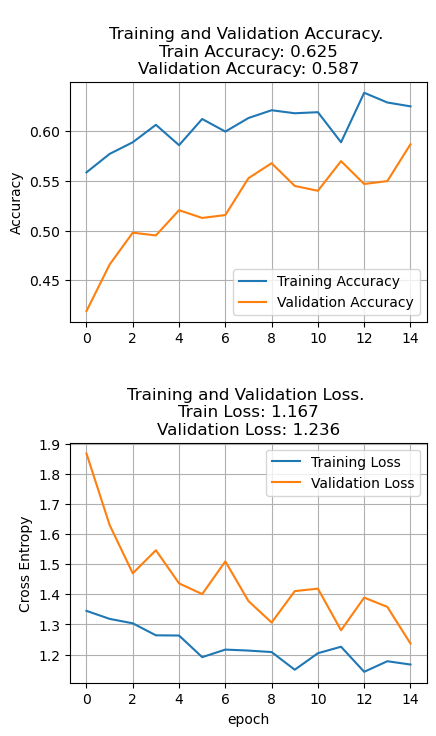

In [ ]:
plot_history(history_resnet)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Make predictions
predictions = resnet_model.predict(valid_generator, 32)
y_pred = np.argmax(predictions, axis=1)

# Get true labels
y_true = valid_generator.classes


Classification Report
                    precision    recall  f1-score   support

           calling       0.40      0.36      0.38       156
          clapping       0.55      0.58      0.56       176
           cycling       0.90      0.96      0.93       165
           dancing       0.64      0.48      0.54       147
          drinking       0.49      0.50      0.50       165
            eating       0.77      0.86      0.81       173
          fighting       0.71      0.54      0.61       178
           hugging       0.64      0.41      0.50       185
          laughing       0.63      0.57      0.60       177
listening_to_music       0.32      0.48      0.38       151
           running       0.67      0.78      0.72       155
           sitting       0.46      0.41      0.43       173
          sleeping       0.61      0.78      0.68       178
           texting       0.43      0.31      0.36       158
      using_laptop       0.50      0.63      0.56       183

          accura

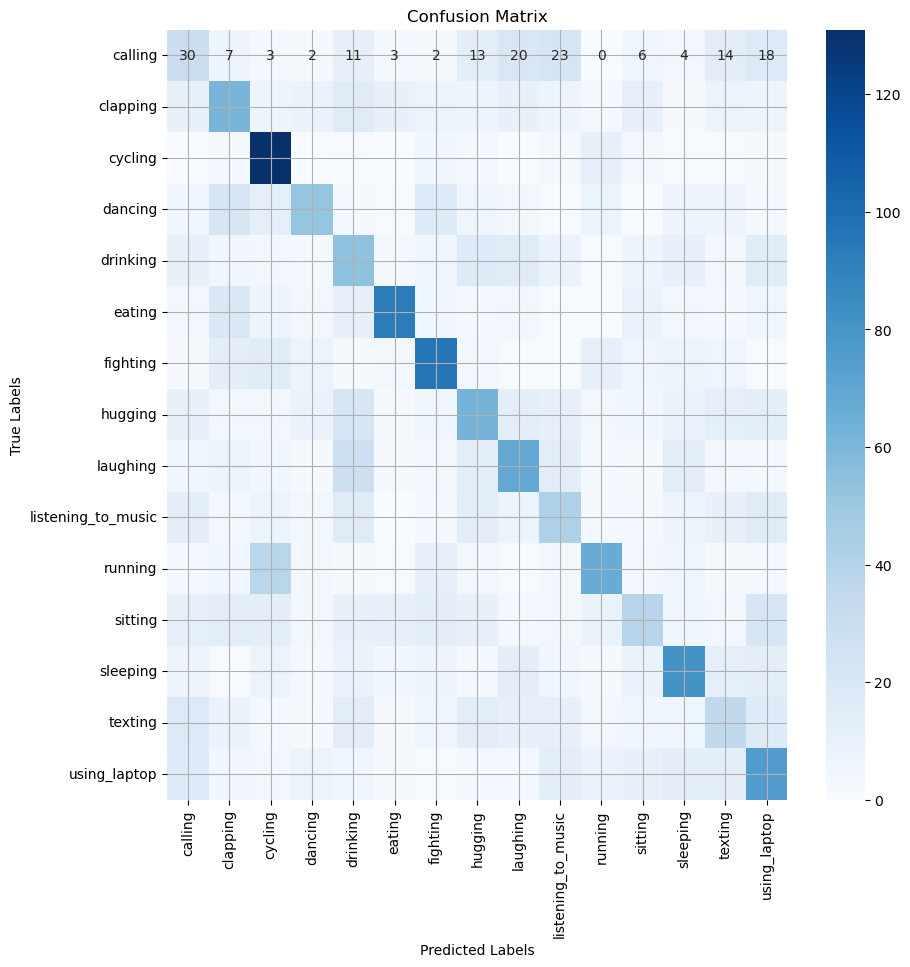

In [ ]:
target_names = list(valid_generator.class_indices.keys())  # Get the class names
report = classification_report(y_true, y_pred, target_names=target_names)
print('Classification Report')
print(report)

# Plot the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

##Mobilenet V2

In [ ]:
def create_model_mobilenet(base_model):

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation = 'relu')(x)

    outputs = Dense(15, activation='softmax')(x)

    model = Model(base_model.inputs, outputs)

    return model

In [ ]:
from tensorflow.keras.applications import MobileNetV2

base_model_mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

for layer in base_model_mobilenet.layers:
    layer.trainable = False

mobilenet_model = create_model_mobilenet(base_model_mobilenet)

mobilenet_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
mobilenet_model.summary()

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_19      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_19[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,585,103 (13.68 MB)

 Trainable params: 1,327,119 (5.06 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set up the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Continue training with early stopping
history_mobilenet = mobilenet_model.fit(
    train_generator,
    epochs=50,
    validation_data=valid_generator,
    callbacks=[early_stopping]
)


Epoch 1/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 98s 304ms/step - accuracy: 0.3703 - loss: 2.0099 - val_accuracy: 0.5623 - val_loss: 1.3583
Epoch 2/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 96s 302ms/step - accuracy: 0.5903 - loss: 1.2526 - val_accuracy: 0.5802 - val_loss: 1.3001
Epoch 3/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 96s 300ms/step - accuracy: 0.6239 - loss: 1.1530 - val_accuracy: 0.5817 - val_loss: 1.2728
Epoch 4/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 97s 304ms/step - accuracy: 0.6465 - loss: 1.0810 - val_accuracy: 0.6000 - val_loss: 1.2392
Epoch 5/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 96s 300ms/step - accuracy: 0.6761 - loss: 1.0169 - val_accuracy: 0.6139 - val_loss: 1.2085
Epoch 6/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 96s 302ms/step - accuracy: 0.6768 - loss: 1.0050 - val_accuracy: 0.6135 - val_loss: 1.2113
Epoch 7/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 96s 300ms/step - accuracy: 0.6795 - loss: 0.9660 - val_accuracy: 0.6218 - val_loss: 1.1873
Epoch 8/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 96s 302ms/step - accuracy: 0.6908 - loss: 0

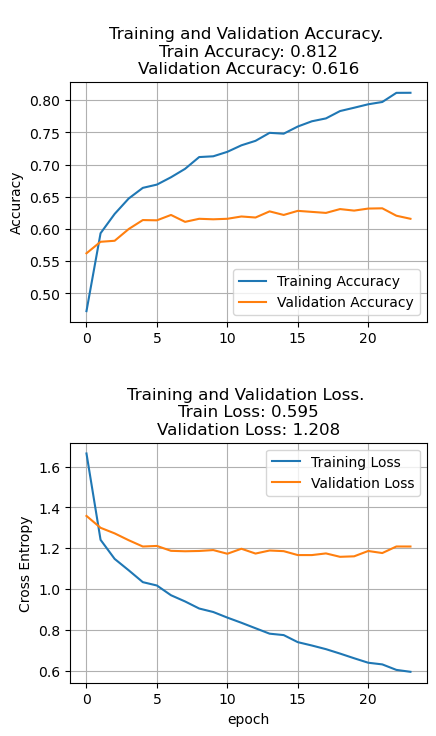

In [ ]:
plot_history(history_mobilenet)

In [ ]:
# Unfreeze some layers of the base model
for layer in base_model_mobilenet.layers[:25]:
    layer.trainable = True


mobilenet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training
history_mobilenet_fine = mobilenet_model.fit(
    train_generator,
    steps_per_epoch=32,
    epochs=15,
    validation_data=valid_generator,
    validation_steps=32
)

Epoch 1/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6882 - loss: 0.9239 - val_accuracy: 0.5596 - val_loss: 1.4358
Epoch 2/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.6973 - loss: 0.8945 - val_accuracy: 0.5674 - val_loss: 1.3964
Epoch 3/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.7165 - loss: 0.8349 - val_accuracy: 0.5445 - val_loss: 1.4314
Epoch 4/15


2024-04-02 11:12:07.750019: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.7099 - loss: 0.8636 - val_accuracy: 0.5576 - val_loss: 1.4391
Epoch 5/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.7416 - loss: 0.7646 - val_accuracy: 0.5410 - val_loss: 1.5279
Epoch 6/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 993ms/step - accuracy: 0.7777 - loss: 0.7177 - val_accuracy: 0.5169 - val_loss: 1.5184
Epoch 7/15


2024-04-02 11:13:51.830196: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.7666 - loss: 0.7272 - val_accuracy: 0.5400 - val_loss: 1.4522
Epoch 8/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.7843 - loss: 0.6418 - val_accuracy: 0.5361 - val_loss: 1.6039
Epoch 9/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.7564 - loss: 0.7271 - val_accuracy: 0.5424 - val_loss: 1.3828
Epoch 10/15


2024-04-02 11:15:36.866762: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/32 ━━━━━━━━━━━━━━━━━━━━ 4s 888ms/step - accuracy: 0.7408 - loss: 0.7569

2024-04-02 11:16:01.029347: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 992ms/step - accuracy: 0.7437 - loss: 0.7500 - val_accuracy: 0.5352 - val_loss: 1.4681
Epoch 11/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.7507 - loss: 0.7481 - val_accuracy: 0.5654 - val_loss: 1.4138
Epoch 12/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 995ms/step - accuracy: 0.7559 - loss: 0.7078 - val_accuracy: 0.5466 - val_loss: 1.4284
Epoch 13/15


2024-04-02 11:17:17.818441: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.7408 - loss: 0.7846 - val_accuracy: 0.5625 - val_loss: 1.4587
Epoch 14/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.8009 - loss: 0.6506 - val_accuracy: 0.5430 - val_loss: 1.4357
Epoch 15/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 991ms/step - accuracy: 0.7816 - loss: 0.7226 - val_accuracy: 0.5169 - val_loss: 1.4944


2024-04-02 11:19:01.434927: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [ ]:
mobilenet_model.save('mobilenet_model.h5')

In [ ]:
# Evaluate the model on the validation set
val_loss, val_accuracy = mobilenet_model.evaluate(valid_generator, steps=len(valid_generator))

print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 239ms/step - accuracy: 0.5340 - loss: 1.5136
Validation Loss: 1.5203897953033447
Validation Accuracy: 0.5373015999794006


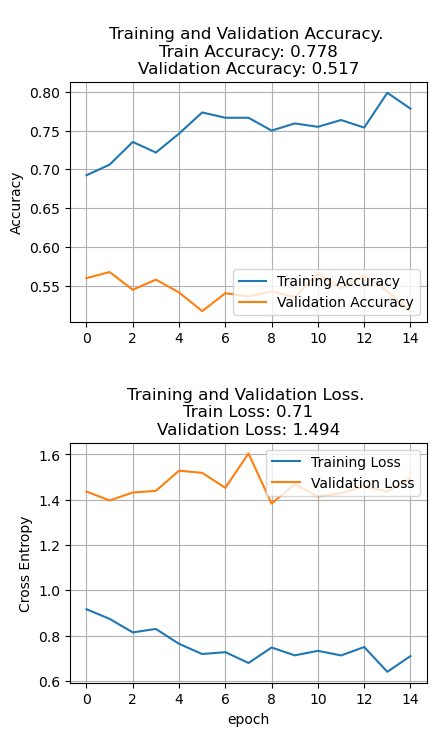

In [ ]:
plot_history(history_mobilenet_fine)

In [ ]:
# Make predictions
predictions_mobilenet = mobilenet_model.predict(valid_generator, 32)
y_pred = np.argmax(predictions, axis=1)

# Get true labels
y_true = valid_generator.classes

79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 245ms/step


Classification Report
                    precision    recall  f1-score   support

           calling       0.40      0.36      0.38       156
          clapping       0.55      0.58      0.56       176
           cycling       0.90      0.96      0.93       165
           dancing       0.64      0.48      0.54       147
          drinking       0.49      0.50      0.50       165
            eating       0.77      0.86      0.81       173
          fighting       0.71      0.54      0.61       178
           hugging       0.64      0.41      0.50       185
          laughing       0.63      0.57      0.60       177
listening_to_music       0.32      0.48      0.38       151
           running       0.67      0.78      0.72       155
           sitting       0.46      0.41      0.43       173
          sleeping       0.61      0.78      0.68       178
           texting       0.43      0.31      0.36       158
      using_laptop       0.50      0.63      0.56       183

          accura

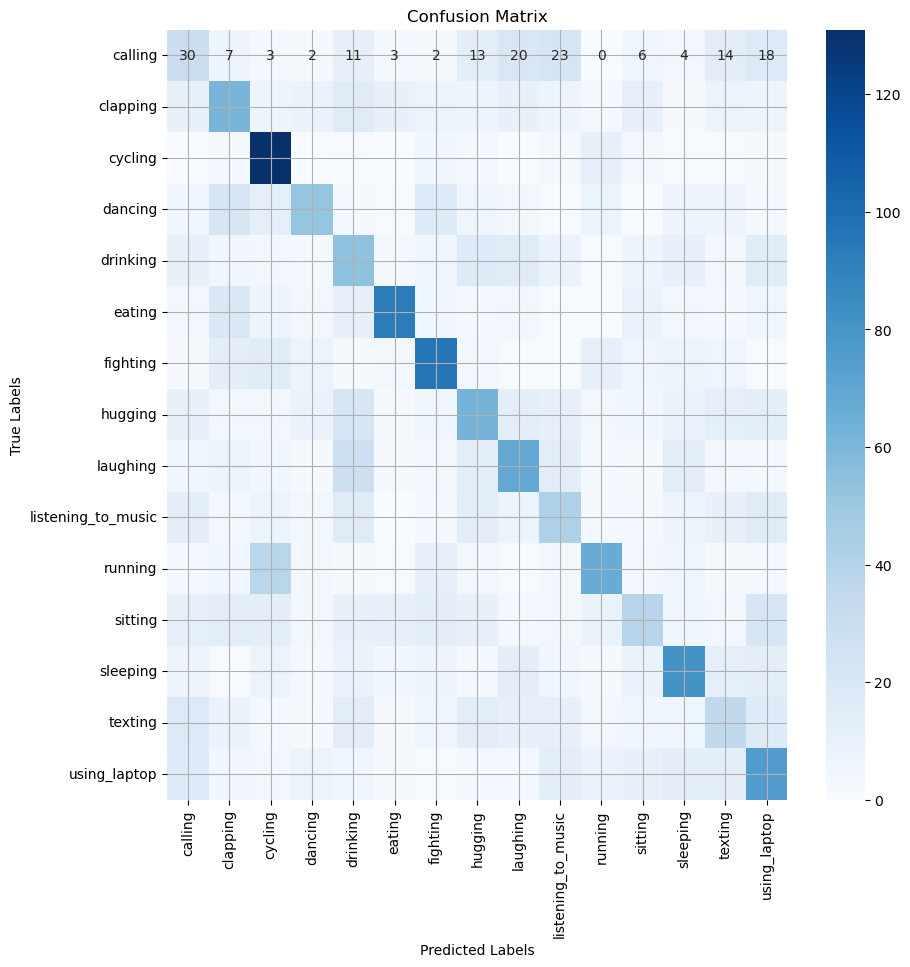

In [ ]:
# Generate a classification report which includes precision, recall, and F1-score for each class
target_names = list(valid_generator.class_indices.keys())  # Get the class names
report = classification_report(y_true, y_pred, target_names=target_names)
print('Classification Report')
print(report)

# Plot the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

##EfficientNetB0

In [ ]:
!pip install -U efficientnet

In [ ]:
import efficientnet.tfkeras as efn

base_model_efficientnet = efn.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

for layer in base_model_efficientnet.layers:
    layer.trainable = False

efficientnet_model = create_model_mobilenet(base_model_efficientnet)

# Compiling the model
efficientnet_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
efficientnet_model.summary()

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_20      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ input_layer_20[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 112, 112,  │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 112, 112,  │      1,536 │ block1a_project_… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 112, 112,  │        384 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 112, 112,  │          0 │ block2a_expand_b

 Total params: 5,376,683 (20.51 MB)

 Trainable params: 1,327,119 (5.06 MB)

 Non-trainable params: 4,049,564 (15.45 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set up the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Continue training with early stopping
history_efficientnet = efficientnet_model.fit(
    train_generator,
    epochs=50,
    validation_data=valid_generator,
    callbacks=[early_stopping]
)


Epoch 1/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 122s 374ms/step - accuracy: 0.3819 - loss: 2.0113 - val_accuracy: 0.5706 - val_loss: 1.3308
Epoch 2/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 119s 375ms/step - accuracy: 0.5991 - loss: 1.2610 - val_accuracy: 0.6008 - val_loss: 1.2181
Epoch 3/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 119s 375ms/step - accuracy: 0.6342 - loss: 1.1439 - val_accuracy: 0.6115 - val_loss: 1.1569
Epoch 4/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 119s 374ms/step - accuracy: 0.6614 - loss: 1.0605 - val_accuracy: 0.6167 - val_loss: 1.1485
Epoch 5/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 119s 374ms/step - accuracy: 0.6615 - loss: 1.0336 - val_accuracy: 0.6389 - val_loss: 1.1138
Epoch 6/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 119s 375ms/step - accuracy: 0.6867 - loss: 0.9759 - val_accuracy: 0.6440 - val_loss: 1.0985
Epoch 7/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 119s 375ms/step - accuracy: 0.6967 - loss: 0.9375 - val_accuracy: 0.6440 - val_loss: 1.0860
Epoch 8/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 118s 372ms/step - accuracy: 0.7021 -

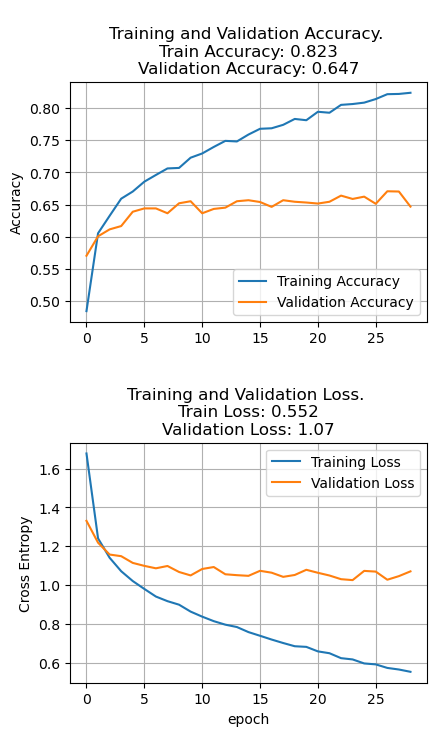

In [ ]:
plot_history(history_efficientnet)

In [ ]:
# Unfreeze some layers of the base model
for layer in base_model_efficientnet.layers[:20]:
    layer.trainable = True

efficientnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training
history_efficientnet_fine = efficientnet_model.fit(
    train_generator,
    steps_per_epoch=32,
    epochs=15,
    validation_data=valid_generator,
    validation_steps=32
)

Epoch 1/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.6377 - loss: 1.0586 - val_accuracy: 0.6348 - val_loss: 1.1367
Epoch 2/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.7103 - loss: 0.8736 - val_accuracy: 0.6758 - val_loss: 1.0223
Epoch 3/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.7588 - loss: 0.7861 - val_accuracy: 0.6970 - val_loss: 0.9254
Epoch 4/15


2024-04-02 12:23:37.587979: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


32/32 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.7123 - loss: 0.8546 - val_accuracy: 0.6699 - val_loss: 1.0206
Epoch 5/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.7871 - loss: 0.6458 - val_accuracy: 0.6738 - val_loss: 0.9989
Epoch 6/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.7876 - loss: 0.6718 - val_accuracy: 0.6864 - val_loss: 0.9438
Epoch 7/15


2024-04-02 12:25:53.310278: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


32/32 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.7841 - loss: 0.7069 - val_accuracy: 0.6787 - val_loss: 1.0141
Epoch 8/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.7319 - loss: 0.7915 - val_accuracy: 0.6797 - val_loss: 0.9798
Epoch 9/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.7723 - loss: 0.6965 - val_accuracy: 0.6886 - val_loss: 0.9125
Epoch 10/15


2024-04-02 12:28:08.829012: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/32 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7669 - loss: 0.6793

2024-04-02 12:28:40.592550: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7655 - loss: 0.6829 - val_accuracy: 0.6797 - val_loss: 0.9693
Epoch 11/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.7664 - loss: 0.6917 - val_accuracy: 0.6846 - val_loss: 0.9485
Epoch 12/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.7561 - loss: 0.6959 - val_accuracy: 0.6907 - val_loss: 0.8935
Epoch 13/15


2024-04-02 12:30:19.691183: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


32/32 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.7574 - loss: 0.7367 - val_accuracy: 0.6865 - val_loss: 0.9512
Epoch 14/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.7431 - loss: 0.7380 - val_accuracy: 0.6836 - val_loss: 0.9798
Epoch 15/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.7968 - loss: 0.6709 - val_accuracy: 0.7055 - val_loss: 0.8788


2024-04-02 12:32:34.873064: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


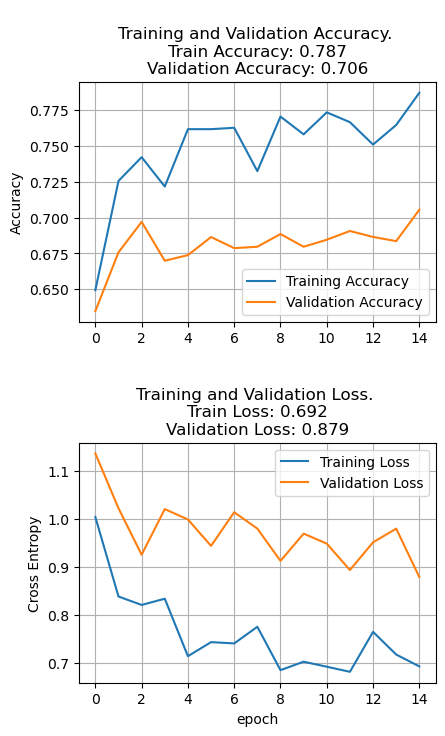

In [ ]:
plot_history(history_efficientnet_fine)

In [ ]:
efficientnet_model.save('efficientnet_model.h5')

In [ ]:
# Make predictions
predictions_efficientnet = efficientnet_model.predict(valid_generator, 32)
y_pred = np.argmax(predictions, axis=1)

y_true = valid_generator.classes

79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 289ms/step


Classification Report
                    precision    recall  f1-score   support

           calling       0.40      0.36      0.38       156
          clapping       0.55      0.58      0.56       176
           cycling       0.90      0.96      0.93       165
           dancing       0.64      0.48      0.54       147
          drinking       0.49      0.50      0.50       165
            eating       0.77      0.86      0.81       173
          fighting       0.71      0.54      0.61       178
           hugging       0.64      0.41      0.50       185
          laughing       0.63      0.57      0.60       177
listening_to_music       0.32      0.48      0.38       151
           running       0.67      0.78      0.72       155
           sitting       0.46      0.41      0.43       173
          sleeping       0.61      0.78      0.68       178
           texting       0.43      0.31      0.36       158
      using_laptop       0.50      0.63      0.56       183

          accura

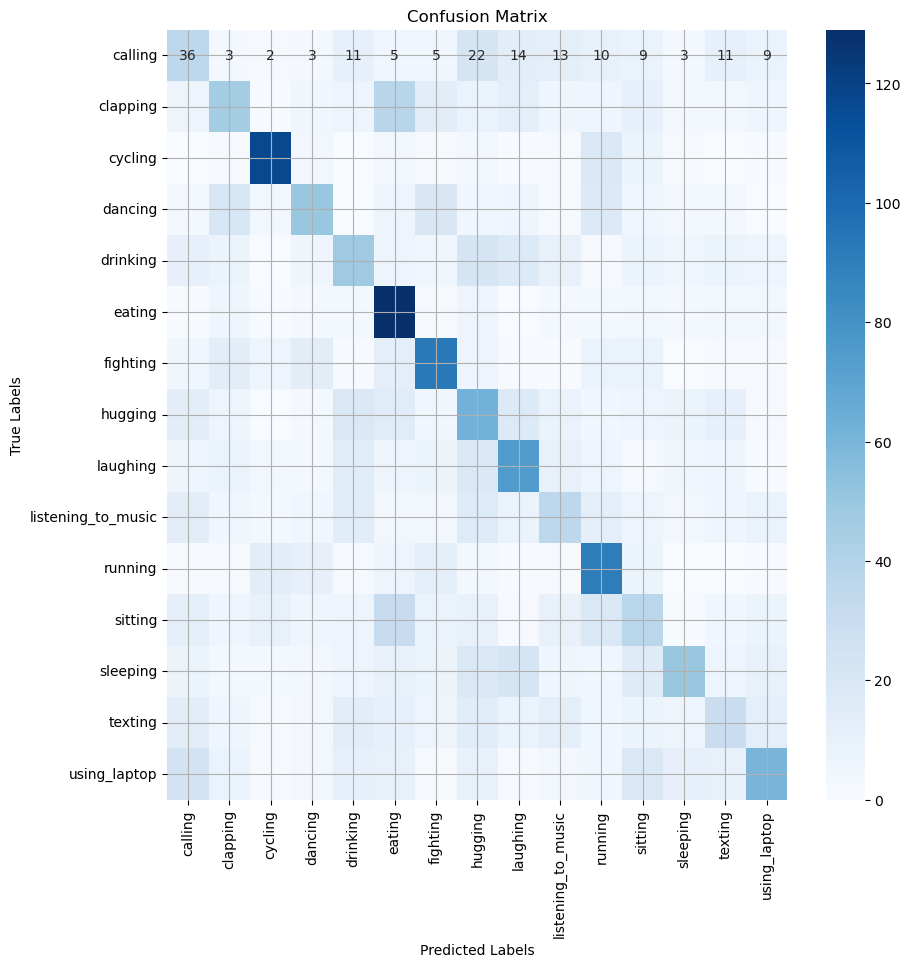

In [ ]:
target_names = list(valid_generator.class_indices.keys())  # Get the class names
report = classification_report(y_true, y_pred, target_names=target_names)
print('Classification Report')
print(report)

# Plot the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

##EfficientNetB0 model predictions on the test dataset

In [ ]:
import matplotlib.image as img

def test_predict(test_images):
    images = np.asarray([read_img(image_path) for image_path in test_images])
    results = efficientnet_model.predict(images)

    fig, axes = plt.subplots(1, len(test_images), figsize=(15,5))

    for i, result in enumerate(results):
        prediction = np.argmax(result)
        probability = np.max(result) * 100
        class_name = [name for name, index in class_indices.items() if index == prediction][0]
        image = img.imread(test_images[i])
        if len(test_images) > 1:
            ax = axes[i]
        else:
            ax = axes
        ax.imshow(image)
        ax.set_title(f"Class: {class_name}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
test_images = [
    "Human Action Recognition 2/train/Image_1013.jpg",
    "Human Action Recognition 2/train/Image_53.jpg",
    "Human Action Recognition 2/train/Image_54.jpg",
    "Human Action Recognition 2/train/Image_58.jpg",
    "Human Action Recognition 2/train/Image_1504.jpg"
]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


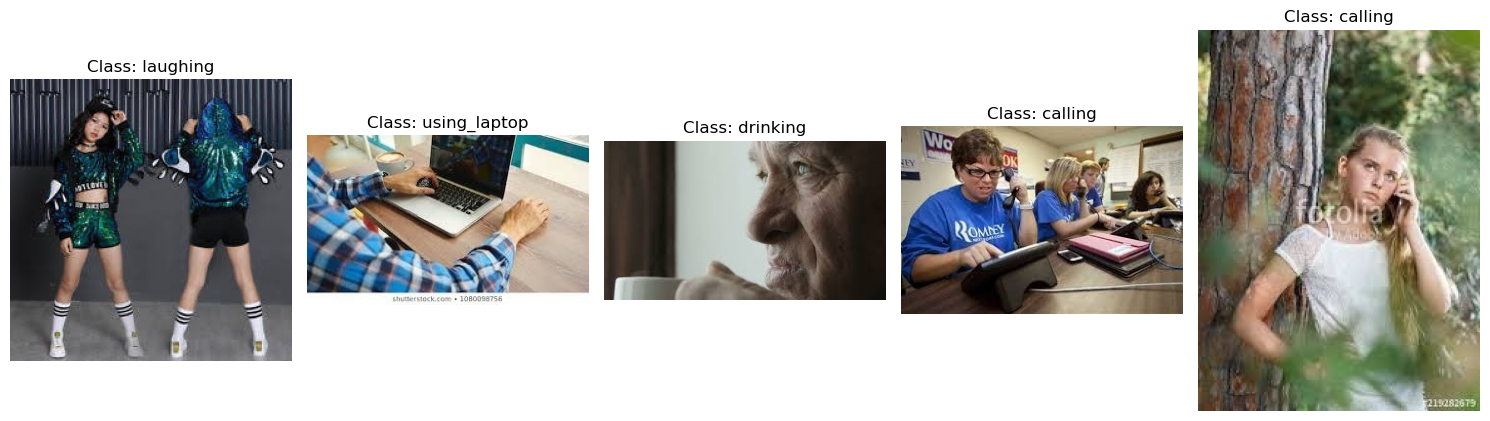

In [ ]:
test_predict(test_images[:5])


##Ensemble Learning

In [ ]:
from tensorflow.keras.layers import Average, Input

input_shape = (224, 224, 3)
input_layer = Input(shape=input_shape)

for layer in resnet_model.layers:
    layer.trainable = False

for layer in mobilenet_model.layers:
    layer.trainable = False

for layer in efficientnet_model.layers:
    layer.trainable = False

resnet50_output = resnet_model(input_layer)
mobilenet_output = mobilenet_model(input_layer)
efficientnetb0_output = efficientnet_model(input_layer)

ensemble_output = Average()([resnet50_output, efficientnetb0_output, mobilenet_output])

ensemble_model = Model(inputs=input_layer, outputs=averaged_outputs)

##Ensemble model predictions on Test dataset

In [ ]:
def test_predict_ensemble(test_images):
    images = np.asarray([read_img(image_path) for image_path in test_images])
    results = ensemble_model.predict(images)

    fig, axes = plt.subplots(1, len(test_images), figsize=(15,5))

    for i, result in enumerate(results):
        prediction = np.argmax(result)
        probability = np.max(result) * 100
        class_name = [name for name, index in class_indices.items() if index == prediction][0]
        image = img.imread(test_images[i])
        if len(test_images) > 1:
            ax = axes[i]
        else:
            ax = axes
        ax.imshow(image)
        ax.set_title(f"Class: {class_name}\nProbability: {probability:.2f}%")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


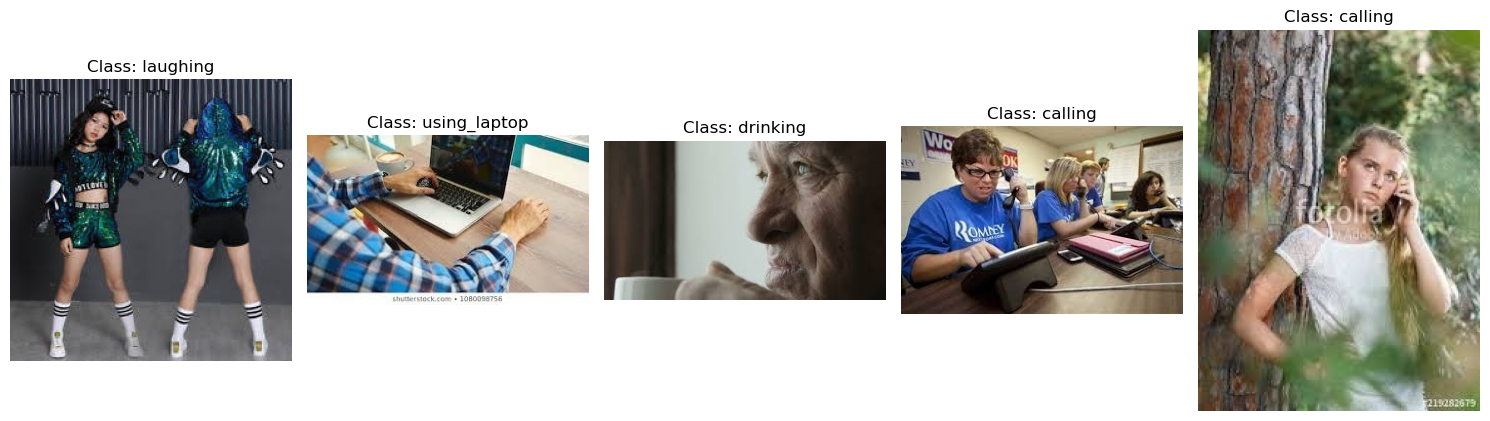

In [ ]:
test_predict_ensemble(test_images[:5])